In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [2]:
X = np.array(df.iloc[:,2:32].astype(float))
print(X)

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["M", "B"])
list(le.classes_)
le.transform(df['diagnosis'])
y = le.transform(df['diagnosis'])

In [5]:
import numpy as np
from sklearn import random_projection
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
acc1=[]
for i in range(1, 31):
    rp1 = random_projection.GaussianRandomProjection(n_components=i, random_state=10)
    X_rp1 =rp1.fit_transform(X_scaled)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf1 = KMeans(init='k-means++',n_clusters=2)
    clf1.fit(X_rp1)
    pred1 = clf1.labels_
    if accuracy_score(pred1,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred1,y)
    if accuracy_score(pred1,y) > 0.5:
        accuracyscore = accuracy_score(pred1,y)
    acc1.append(accuracyscore)
print(acc1)

acc2=[]
for i in range(1, 31):
    rp2 = random_projection.SparseRandomProjection(n_components=i, random_state=10)
    X_rp2 =rp2.fit_transform(X_scaled)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf2 = KMeans(init='k-means++',n_clusters=2)
    clf2.fit(X_rp2)
    pred2 = clf2.labels_
    if accuracy_score(pred2,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred2,y)
    if accuracy_score(pred2,y) > 0.5:
        accuracyscore = accuracy_score(pred2,y)
    acc2.append(accuracyscore)
print(acc2)



[0.83655536028119504, 0.84182776801405979, 0.78734622144112476, 0.78734622144112476, 0.74868189806678376, 0.65377855887521963, 0.64147627416520214, 0.64323374340949035, 0.86467486818980666, 0.86467486818980666, 0.86643233743409487, 0.89103690685413006, 0.89279437609841827, 0.89279437609841827, 0.89982425307557112, 0.89982425307557112, 0.90333919156414766, 0.9086115992970123, 0.91564147627416514, 0.91915641476274168, 0.9086115992970123, 0.91036906854130051, 0.90158172231985945, 0.90158172231985945, 0.90158172231985945, 0.89982425307557112, 0.86467486818980666, 0.90333919156414766, 0.90333919156414766, 0.90685413005272408]
[0.66432337434094901, 0.67311072056239019, 0.91739894551845347, 0.843585237258348, 0.87873462214411246, 0.8963093145869947, 0.8963093145869947, 0.86643233743409487, 0.9086115992970123, 0.88224956063268889, 0.89982425307557112, 0.88224956063268889, 0.89982425307557112, 0.86467486818980666, 0.86291739894551844, 0.91564147627416514, 0.91388400702987693, 0.9068541300527240

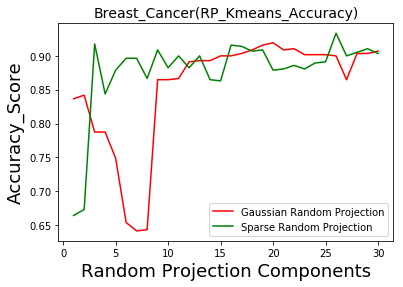

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1, 31), acc1, color='r', label='Gaussian Random Projection')
plt.plot(range(1, 31), acc2, color='g', label='Sparse Random Projection')

plt.xlabel('Random Projection Components',fontsize=18)
plt.ylabel('Accuracy_Score',fontsize=18)
plt.title('Breast_Cancer(RP_Kmeans_Accuracy)',fontsize=14)
plt.legend(loc='lower right')
plt.show()

In [8]:
rp = random_projection.SparseRandomProjection(n_components=27, random_state=10)
X_rp =rp.fit_transform(X_scaled)

In [9]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_rp)
    Sum_of_squared_distances.append(km.inertia_)

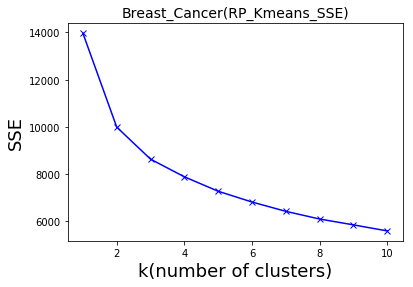

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k(number of clusters)',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.title('Breast_Cancer(RP_Kmeans_SSE)',fontsize=14)
plt.show()

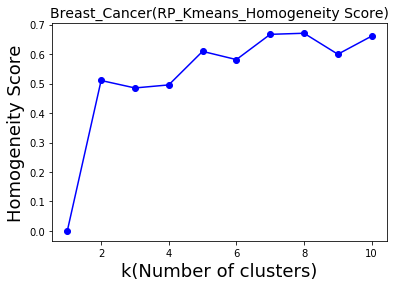

In [11]:
from sklearn import metrics
homogeneity_scores=[]
clusters=range(1,11)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_rp)
    lable = km.labels_
    homogeneity_scores.append(metrics.homogeneity_score(y,lable ))
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(RP_Kmeans_Homogeneity Score)',fontsize=14)
plt.show()

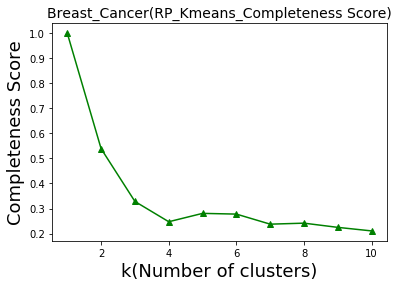

In [12]:
from sklearn import metrics
completeness_scores=[]
clusters=range(1,11)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_rp)
    lable = km.labels_
    completeness_scores.append(metrics.completeness_score(y,lable ))
plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Breast_Cancer(RP_Kmeans_Completeness Score)',fontsize=14)
plt.show()

In [ ]:
import numpy as np
from sklearn import random_projection
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
acc2=[]
for i in range(1, 31):
    rp2 = random_projection.SparseRandomProjection(n_components=i, random_state=10)
    X_rp2 =rp1.fit_transform(X_scaled)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf2 = KMeans(init='k-means++',n_clusters=2)
    clf2.fit(X_rp2)
    pred2 = clf2.labels_
    if accuracy_score(pred2,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred2,y)
    if accuracy_score(pred2,y) > 0.5:
        accuracyscore = accuracy_score(pred2,y)
    acc2.append(accuracyscore)
print(acc2)



In [ ]:
import numpy as np
from sklearn import random_projection
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score
acc1=[]
for i in range(1, 31):
    rp1 = random_projection.GaussianRandomProjection(n_components=i, random_state=10)
    X_rp1 =rp1.fit_transform(X_scaled)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf1 = GMM(covariance_type = 'full')
    clf1.set_params(n_components=2)
    pred1 = clf1.fit_predict(X_rp1)
    if accuracy_score(pred1,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred1,y)
    if accuracy_score(pred1,y) > 0.5:
        accuracyscore = accuracy_score(pred1,y)
    acc1.append(accuracyscore)
print(acc1)

acc2=[]
for i in range(1, 31):
    rp2 = random_projection.SparseRandomProjection(n_components=i, random_state=10)
    X_rp2 =rp2.fit_transform(X_scaled)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf2 = GMM(covariance_type = 'full')
    clf2.set_params(n_components=2)
    pred2 = clf1.fit_predict(X_rp2)
    if accuracy_score(pred2,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred2,y)
    if accuracy_score(pred2,y) > 0.5:
        accuracyscore = accuracy_score(pred2,y)
    acc2.append(accuracyscore)
print(acc2)



In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 31), acc1, color='r', label='Gaussian Random Projection')
plt.plot(range(1, 31), acc2, color='g', label='Sparse Random Projection')

plt.xlabel('Random Projection Components',fontsize=18)
plt.ylabel('Accuracy_Score',fontsize=18)
plt.title('Breast_Cancer(RP_GMM_Accuracy)',fontsize=14)
plt.legend(loc='lower right')
plt.show()

In [ ]:
rp = random_projection.SparseRandomProjection(n_components=27, random_state=10)
X_rp =rp.fit_transform(X_scaled)

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
ll=[]
bic=[]
homogeinity_scores=[]
completeness_scores=[]
clusters=range(1,11)
model = GMM(covariance_type = 'full')
for k in clusters:
            model.set_params(n_components=k)
            model.fit(X_rp)
            labels = model.predict(X_rp)
            ll.append(model.score(X_rp))
            bic.append(model.bic(X_rp))
            homogeinity_scores.append(metrics.homogeneity_score(y,labels))
            completeness_scores.append(metrics.completeness_score(y,labels))
print(bic)

In [ ]:
plt.plot(clusters, ll, color='blue')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Log Probability',fontsize=18);
plt.title('Breast_Cancer(RP_GMM_Full_Covariance_Log_Probability)',fontsize=14)
plt.show()

In [ ]:
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(RP_GMM_Full_Covariance_Homogeneity Score)',fontsize=14)
plt.show()

In [ ]:
plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Breast_Cancer(RP_GMM_Full_Covariance_Completeness Score)',fontsize=14)
plt.show()

In [ ]:
bic2=[11384.689237062925, 6174.7941841756538, 6286.2584335971933, 6735.7435571933156, 7807.6451755694579, 9331.5570355781056, 9133.3432808520811, 9680.4796992095507, 11892.956328863042, 15037.456278903926]
plt.plot(clusters, bic,'g^-',label='RP BIC')
plt.plot(clusters, bic2,'bo-',label='RAW BIC')
plt.legend(loc='upper right')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('BIC_score',fontsize=18)
plt.title('Breast_Cancer(GMM_BIC VS RP_GMM_BIC)',fontsize=14)
plt.show()